##### Copyright 2021 The TF-Agents Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Train a Deep Q Network with TF-Agents

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/agents/tutorials/1_dqn_tutorial">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/agents/blob/master/docs/tutorials/1_dqn_tutorial.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/agents/blob/master/docs/tutorials/1_dqn_tutorial.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/agents/docs/tutorials/1_dqn_tutorial.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

## Introduction


This example shows how to train a [DQN (Deep Q Networks)](https://storage.googleapis.com/deepmind-media/dqn/DQNNaturePaper.pdf)  agent on the Cartpole environment using the TF-Agents library.

![Cartpole environment](https://raw.githubusercontent.com/tensorflow/agents/master/docs/tutorials/images/cartpole.png)

It will walk you through all the components in a Reinforcement Learning (RL) pipeline for training, evaluation and data collection.


To run this code live, click the 'Run in Google Colab' link above.


## Setup

If you haven't installed the following dependencies, run:

In [2]:
!sudo apt-get update
!sudo apt-get install -y xvfb ffmpeg freeglut3-dev
!pip install 'imageio==2.4.0'
!pip install pyvirtualdisplay
!pip install tf-agents[reverb]
!pip install pyglet

0% [Working]

Hit:1 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
0% [1 InRelease gpgv 242 kB] [Connecting to security.ubuntu.com (185.125.190.36

Hit:4 https://nvidia.github.io/libnvidia-container/stable/ubuntu18.04/amd64  InRelease
Get:5 https://nvidia.github.io/nvidia-container-runtime/ubuntu18.04/amd64  InRelease [1481 B]
Ign:6 http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://nvidia.github.io/nvidia-docker/ubuntu18.04/amd64  InRelease [1474 B]
Get:8 http://packages.cloud.google.com/apt google-cloud-logging-wheezy InRelease [5483 B]
Get:9 https://packages.cloud.google.com/apt eip-cloud-bionic InRelease [5419 B]
Hit:10 http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
0% [1 InRelease gpgv 242 kB] [Connecting to security.ubuntu.com (185.125.190.36

Hit:11 http://archive.canonical.com/ubuntu bionic InRelease
0% [2 InRelease gpgv 88.7 kB] [Waiting for headers]

Get:12 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
0% [3 InRelease gpgv 74.6 kB] [12 InRelease 12.6 kB/88.7 kB 14%]

0% [4 InRelease gpgv 1484 B] [12 InRelease 12.6 kB/88.7 kB 14%]

0% [5 InRelease gpgv 1481 B] [12 InRelease 38.3 kB/88.7 kB 43%]

0% [7 InRelease gpgv 1474 B] [12 InRelease 65.4 kB/88.7 kB 74%]

0% [7 InRelease gpgv 1474 B]

0% [9 InRelease gpgv 5419 B]

Err:9 https://packages.cloud.google.com/apt eip-cloud-bionic InRelease
  The following signatures couldn't be verified because the public key is not available: NO_PUBKEY FEEA9169307EA071 NO_PUBKEY 8B57C5C2836F4BEB
0% [8 InRelease gpgv 5483 B]

Err:8 http://packages.cloud.google.com/apt google-cloud-logging-wheezy InRelease
  The following signatures couldn't be verified because the public key is not available: NO_PUBKEY FEEA9169307EA071 NO_PUBKEY 8B57C5C2836F4BEB
0% [Release.gpg gpgv 564 B]

0% [11 InRelease gpgv 10.2 kB]

0% [12 InRelease gpgv 88.7 kB]

Fetched 266 kB in 1s (288 kB/s)


W: An error occurred during the signature verification. The repository is not updated and the previous index files will be used. GPG error: https://packages.cloud.google.com/apt eip-cloud-bionic InRelease: The following signatures couldn't be verified because the public key is not available: NO_PUBKEY FEEA9169307EA071 NO_PUBKEY 8B57C5C2836F4BEB
W: An error occurred during the signature verification. The repository is not updated and the previous index files will be used. GPG error: http://packages.cloud.google.com/apt google-cloud-logging-wheezy InRelease: The following signatures couldn't be verified because the public key is not available: NO_PUBKEY FEEA9169307EA071 NO_PUBKEY 8B57C5C2836F4BEB
W: Failed to fetch https://packages.cloud.google.com/apt/dists/eip-cloud-bionic/InRelease  The following signatures couldn't be verified because the public key is not available: NO_PUBKEY FEEA9169307EA071 NO_PUBKEY 8B57C5C2836F4BEB
W: Failed to fetch http://packages.cloud.google.com/apt/dists/go



freeglut3-dev is already the newest version (2.8.1-3).


The following packages were automatically installed and are no longer required:
  linux-gcp-5.4-headers-5.4.0-1040 linux-gcp-5.4-headers-5.4.0-1043
  linux-gcp-5.4-headers-5.4.0-1044 linux-gcp-5.4-headers-5.4.0-1049
  linux-gcp-5.4-headers-5.4.0-1052 linux-gcp-5.4-headers-5.4.0-1062
  linux-headers-5.4.0-1062-gcp linux-image-5.4.0-1062-gcp
  linux-modules-5.4.0-1062-gcp linux-modules-extra-5.4.0-1062-gcp
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  i965-va-driver libaacs0 libass9 libasyncns0 libavc1394-0 libavcodec57
  libavdevice57 libavfilter6 libavformat57 libavresample3 libavutil55
  libbdplus0 libbluray2 libbs2b0 libcaca0 libcdio-cdda2 libcdio-paranoia2
  libcdio17 libchromaprint1 libcrystalhd3 libdc1394-22 libfftw3-double3
  libflac8 libflite1 libgme0 libgsm1 libiec61883-0 libjack-jackd2-0
  libmp3lame0 libmpg123-0 libmysofa0 libnorm1 libnuma1 libogg0 libopenal-data
  libopenal1 libopenjp2-7 libopenmpt0 libopus0 libpgm-5.2-0 lib

The following NEW packages will be installed:
  ffmpeg i965-va-driver libaacs0 libass9 libasyncns0 libavc1394-0 libavcodec57
  libavdevice57 libavfilter6 libavformat57 libavresample3 libavutil55
  libbdplus0 libbluray2 libbs2b0 libcaca0 libcdio-cdda2 libcdio-paranoia2
  libcdio17 libchromaprint1 libcrystalhd3 libdc1394-22 libfftw3-double3
  libflac8 libflite1 libgme0 libgsm1 libiec61883-0 libjack-jackd2-0
  libmp3lame0 libmpg123-0 libmysofa0 libnorm1 libnuma1 libogg0 libopenal-data
  libopenal1 libopenjp2-7 libopenmpt0 libopus0 libpgm-5.2-0 libpostproc54
  libpulse0 libraw1394-11 librubberband2 libsamplerate0 libsdl2-2.0-0
  libshine3 libsnappy1v5 libsndfile1 libsndio6.1 libsodium23 libsoxr0
  libspeex1 libssh-gcrypt-4 libswresample2 libswscale4 libtheora0 libtwolame0
  libva-drm2 libva-x11-2 libva2 libvorbis0a libvorbisenc2 libvorbisfile3
  libvpx5 libwavpack1 libwebpmux3 libx264-152 libx265-146 libxss1 libxv1
  libxvidcore4 libzmq5 libzvbi-common libzvbi0 mesa-va-drivers va-driver-al

Get:5 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libva-drm2 amd64 2.1.0-3 [6880 B]
Get:6 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libva-x11-2 amd64 2.1.0-3 [11.5 kB]
Get:7 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libavutil55 amd64 7:3.4.8-0ubuntu0.2 [190 kB]
Get:8 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libcrystalhd3 amd64 1:0.0~git20110715.fdd2f19-12 [45.8 kB]
3% [Waiting for headers]

Get:9 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libgsm1 amd64 1.0.13-4build1 [22.4 kB]
Get:10 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libmp3lame0 amd64 3.100-2 [136 kB]
Get:11 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libopenjp2-7 amd64 2.3.0-2build0.18.04.1 [145 kB]
Get:12 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libopus0 amd64 1.1.2-1ubuntu1 [159 kB]
Get:13 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libshine3 amd64 3.1.1-1 [22.9 kB]
Get:14 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libsnappy1v5 amd64 1.1.7-1 [16.0 kB]
Get:15 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic-updates/main amd64 libspeex1 amd64 1.2~rc1.2-1ubuntu2.1 [52.1 kB]
Get:16 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libsoxr0 amd64 0.1.2-3 [65.9 kB]
Get:17 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic-

Get:23 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic-updates/main amd64 libwavpack1 amd64 5.1.0-2ubuntu1.5 [76.8 kB]
Get:24 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic-updates/main amd64 libwebpmux3 amd64 0.6.1-2ubuntu0.18.04.1 [19.6 kB]
Get:25 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libx264-152 amd64 2:0.152.2854+gite9a5903-2 [609 kB]
11% [25 libx264-152 27.8 kB/609 kB 5%]

Get:26 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libx265-146 amd64 2.6-3 [1026 kB]
15% [Waiting for headers]

Get:27 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libxvidcore4 amd64 2:1.3.5-1 [200 kB]
Get:28 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libzvbi-common all 0.2.35-13 [32.1 kB]
Get:29 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libzvbi0 amd64 0.2.35-13 [235 kB]
Get:30 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libavcodec57 amd64 7:3.4.8-0ubuntu0.2 [4595 kB]
17% [30 libavcodec57 12.3 kB/4595 kB 0%]

Get:31 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libraw1394-11 amd64 2.1.2-1 [30.7 kB]
Get:32 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libavc1394-0 amd64 0.5.4-4build1 [16.1 kB]
Get:33 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libass9 amd64 1:0.14.0-1 [88.2 kB]
Get:34 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libbluray2 amd64 1:1.0.2-3 [141 kB]
Get:35 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libchromaprint1 amd64 1.4.3-1 [36.8 kB]
Get:36 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libgme0 amd64 0.6.2-1 [121 kB]
Get:37 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libmpg123-0 amd64 1.25.10-1 [125 kB]
Get:38 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libvorbisfile3 amd64 1.3.5-4.2 [16.0 kB]
Get:39 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libopenmpt0 a

Get:40 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic-updates/main amd64 libssh-gcrypt-4 amd64 0.8.0~20170825.94fa1e38-1ubuntu0.7 [172 kB]
Get:41 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libavformat57 amd64 7:3.4.8-0ubuntu0.2 [953 kB]
33% [41 libavformat57 12.3 kB/953 kB 1%]

36% [Waiting for headers]

Get:42 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libavresample3 amd64 7:3.4.8-0ubuntu0.2 [52.6 kB]
Get:43 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libbs2b0 amd64 3.1.0+dfsg-2.2 [10.5 kB]
36% [Waiting for headers]

Get:44 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libflite1 amd64 2.1-release-1 [12.8 MB]
36% [44 libflite1 2411 B/12.8 MB 0%]

Get:45 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libmysofa0 amd64 0.6~dfsg0-3+deb10u1build1 [38.5 kB]
Get:46 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libpostproc54 amd64 7:3.4.8-0ubuntu0.2 [50.3 kB]
Get:47 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libfftw3-double3 amd64 3.3.7-1 [735 kB]
Get:48 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libsamplerate0 amd64 0.1.9-1 [938 kB]
70% [Waiting for headers]

Get:49 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 librubberband2 amd64 1.8.1-7ubuntu2 [86.7 kB]
Get:50 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libswscale4 amd64 7:3.4.8-0ubuntu0.2 [150 kB]
71% [Waiting for headers]

Get:51 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libnorm1 amd64 1.5r6+dfsg1-6 [224 kB]
Get:52 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libpgm-5.2-0 amd64 5.2.122~dfsg-2 [157 kB]
Get:53 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libsodium23 amd64 1.0.16-2 [143 kB]
73% [Waiting for headers]

Get:54 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libzmq5 amd64 4.2.5-1ubuntu0.2 [221 kB]
Get:55 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libavfilter6 amd64 7:3.4.8-0ubuntu0.2 [874 kB]
Get:56 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic-updates/main amd64 libcaca0 amd64 0.99.beta19-2ubuntu0.18.04.3 [203 kB]
Get:57 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libcdio17 amd64 1.0.0-2ubuntu2 [58.8 kB]
77% [Working]

Get:58 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libcdio-cdda2 amd64 10.2+0.94+2-2build1 [17.7 kB]
Get:59 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libcdio-paranoia2 amd64 10.2+0.94+2-2build1 [17.2 kB]
Get:60 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libdc1394-22 amd64 2.2.5-1 [77.5 kB]
Get:61 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libiec61883-0 amd64 1.2.0-2 [23.5 kB]
Get:62 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libjack-jackd2-0 amd64 1.9.12~dfsg-2 [263 kB]
Get:63 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libopenal-data all 1:1.18.2-2 [102 kB]
Get:64 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libsndio6.1 amd64 1.1.0-3 [23.4 kB]
Get:65 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libopenal1 amd64 1:1.18.2-2 [266 kB]
Get:66 http://us-central1.gce.archive.ubuntu.com/ubuntu

Get:70 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libsdl2-2.0-0 amd64 2.0.8+dfsg1-1ubuntu1.18.04.4 [382 kB]
Get:71 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/main amd64 libxv1 amd64 2:1.0.11-1 [10.7 kB]
85% [Waiting for headers]

Get:72 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libavdevice57 amd64 7:3.4.8-0ubuntu0.2 [74.9 kB]
85% [Waiting for headers]

Get:73 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 ffmpeg amd64 7:3.4.8-0ubuntu0.2 [1587 kB]
89% [Waiting for headers]

Get:74 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libaacs0 amd64 0.9.0-1 [51.4 kB]
Get:75 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 libbdplus0 amd64 0.1.2-2 [46.6 kB]
Get:76 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 mesa-va-drivers amd64 20.0.8-0ubuntu1~18.04.1 [2376 kB]
Get:77 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 i965-va-driver amd64 2.1.0-0ubuntu1 [925 kB]
96% [77 i965-va-driver 64.8 kB/925 kB 7%]

Get:78 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic/universe amd64 va-driver-all amd64 2.1.0-3 [4376 B]
Get:79 http://us-central1.gce.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.10 [784 kB]
Fetched 35.7 MB in 1s (27.8 MB/s)


Extracting templates from packages: 37%

Extracting templates from packages: 75%

Extracting templates from packages: 100%


Selecting previously unselected package libogg0:amd64.


(Reading database ... 322866 files and directories currently installed.)
Preparing to unpack .../00-libogg0_1.3.2-1_amd64.deb ...
Unpacking libogg0:amd64 (1.3.2-1) ...


Selecting previously unselected package libxss1:amd64.


Preparing to unpack .../01-libxss1_1%3a1.2.2-1_amd64.deb ...
Unpacking libxss1:amd64 (1:1.2.2-1) ...
Selecting previously unselected package libnuma1:amd64.


Preparing to unpack .../02-libnuma1_2.0.11-2.1ubuntu0.1_amd64.deb ...
Unpacking libnuma1:amd64 (2.0.11-2.1ubuntu0.1) ...


Selecting previously unselected package libva2:amd64.


Preparing to unpack .../03-libva2_2.1.0-3_amd64.deb ...
Unpacking libva2:amd64 (2.1.0-3) ...


Selecting previously unselected package libva-drm2:amd64.
Preparing to unpack .../04-libva-drm2_2.1.0-3_amd64.deb ...
Unpacking libva-drm2:amd64 (2.1.0-3) ...


Selecting previously unselected package libva-x11-2:amd64.


Preparing to unpack .../05-libva-x11-2_2.1.0-3_amd64.deb ...
Unpacking libva-x11-2:amd64 (2.1.0-3) ...
Selecting previously unselected package libavutil55:amd64.


Preparing to unpack .../06-libavutil55_7%3a3.4.8-0ubuntu0.2_amd64.deb ...
Unpacking libavutil55:amd64 (7:3.4.8-0ubuntu0.2) ...


Selecting previously unselected package libcrystalhd3:amd64.


Preparing to unpack .../07-libcrystalhd3_1%3a0.0~git20110715.fdd2f19-12_amd64.deb ...
Unpacking libcrystalhd3:amd64 (1:0.0~git20110715.fdd2f19-12) ...


Selecting previously unselected package libgsm1:amd64.
Preparing to unpack .../08-libgsm1_1.0.13-4build1_amd64.deb ...
Unpacking libgsm1:amd64 (1.0.13-4build1) ...


Selecting previously unselected package libmp3lame0:amd64.


Preparing to unpack .../09-libmp3lame0_3.100-2_amd64.deb ...
Unpacking libmp3lame0:amd64 (3.100-2) ...


Selecting previously unselected package libopenjp2-7:amd64.
Preparing to unpack .../10-libopenjp2-7_2.3.0-2build0.18.04.1_amd64.deb ...
Unpacking libopenjp2-7:amd64 (2.3.0-2build0.18.04.1) ...


Selecting previously unselected package libopus0:amd64.
Preparing to unpack .../11-libopus0_1.1.2-1ubuntu1_amd64.deb ...
Unpacking libopus0:amd64 (1.1.2-1ubuntu1) ...


Selecting previously unselected package libshine3:amd64.


Preparing to unpack .../12-libshine3_3.1.1-1_amd64.deb ...
Unpacking libshine3:amd64 (3.1.1-1) ...


Selecting previously unselected package libsnappy1v5:amd64.
Preparing to unpack .../13-libsnappy1v5_1.1.7-1_amd64.deb ...
Unpacking libsnappy1v5:amd64 (1.1.7-1) ...


Selecting previously unselected package libspeex1:amd64.


Preparing to unpack .../14-libspeex1_1.2~rc1.2-1ubuntu2.1_amd64.deb ...
Unpacking libspeex1:amd64 (1.2~rc1.2-1ubuntu2.1) ...


Selecting previously unselected package libsoxr0:amd64.
Preparing to unpack .../15-libsoxr0_0.1.2-3_amd64.deb ...
Unpacking libsoxr0:amd64 (0.1.2-3) ...


Selecting previously unselected package libswresample2:amd64.


Preparing to unpack .../16-libswresample2_7%3a3.4.8-0ubuntu0.2_amd64.deb ...
Unpacking libswresample2:amd64 (7:3.4.8-0ubuntu0.2) ...


Selecting previously unselected package libtheora0:amd64.
Preparing to unpack .../17-libtheora0_1.1.1+dfsg.1-14_amd64.deb ...


Unpacking libtheora0:amd64 (1.1.1+dfsg.1-14) ...


Selecting previously unselected package libtwolame0:amd64.
Preparing to unpack .../18-libtwolame0_0.3.13-3_amd64.deb ...
Unpacking libtwolame0:amd64 (0.3.13-3) ...


Selecting previously unselected package libvorbis0a:amd64.


Preparing to unpack .../19-libvorbis0a_1.3.5-4.2_amd64.deb ...
Unpacking libvorbis0a:amd64 (1.3.5-4.2) ...


Selecting previously unselected package libvorbisenc2:amd64.


Preparing to unpack .../20-libvorbisenc2_1.3.5-4.2_amd64.deb ...
Unpacking libvorbisenc2:amd64 (1.3.5-4.2) ...


Selecting previously unselected package libvpx5:amd64.
Preparing to unpack .../21-libvpx5_1.7.0-3ubuntu0.18.04.1_amd64.deb ...
Unpacking libvpx5:amd64 (1.7.0-3ubuntu0.18.04.1) ...


Selecting previously unselected package libwavpack1:amd64.


Preparing to unpack .../22-libwavpack1_5.1.0-2ubuntu1.5_amd64.deb ...
Unpacking libwavpack1:amd64 (5.1.0-2ubuntu1.5) ...


Selecting previously unselected package libwebpmux3:amd64.


Preparing to unpack .../23-libwebpmux3_0.6.1-2ubuntu0.18.04.1_amd64.deb ...
Unpacking libwebpmux3:amd64 (0.6.1-2ubuntu0.18.04.1) ...
Selecting previously unselected package libx264-152:amd64.


Preparing to unpack .../24-libx264-152_2%3a0.152.2854+gite9a5903-2_amd64.deb ...
Unpacking libx264-152:amd64 (2:0.152.2854+gite9a5903-2) ...


Selecting previously unselected package libx265-146:amd64.


Preparing to unpack .../25-libx265-146_2.6-3_amd64.deb ...
Unpacking libx265-146:amd64 (2.6-3) ...


Selecting previously unselected package libxvidcore4:amd64.


Preparing to unpack .../26-libxvidcore4_2%3a1.3.5-1_amd64.deb ...
Unpacking libxvidcore4:amd64 (2:1.3.5-1) ...


Selecting previously unselected package libzvbi-common.


Preparing to unpack .../27-libzvbi-common_0.2.35-13_all.deb ...
Unpacking libzvbi-common (0.2.35-13) ...


Selecting previously unselected package libzvbi0:amd64.
Preparing to unpack .../28-libzvbi0_0.2.35-13_amd64.deb ...


Unpacking libzvbi0:amd64 (0.2.35-13) ...


Selecting previously unselected package libavcodec57:amd64.
Preparing to unpack .../29-libavcodec57_7%3a3.4.8-0ubuntu0.2_amd64.deb ...


Unpacking libavcodec57:amd64 (7:3.4.8-0ubuntu0.2) ...


Selecting previously unselected package libraw1394-11:amd64.
Preparing to unpack .../30-libraw1394-11_2.1.2-1_amd64.deb ...
Unpacking libraw1394-11:amd64 (2.1.2-1) ...


Selecting previously unselected package libavc1394-0:amd64.


Preparing to unpack .../31-libavc1394-0_0.5.4-4build1_amd64.deb ...
Unpacking libavc1394-0:amd64 (0.5.4-4build1) ...


Selecting previously unselected package libass9:amd64.
Preparing to unpack .../32-libass9_1%3a0.14.0-1_amd64.deb ...
Unpacking libass9:amd64 (1:0.14.0-1) ...


Selecting previously unselected package libbluray2:amd64.


Preparing to unpack .../33-libbluray2_1%3a1.0.2-3_amd64.deb ...
Unpacking libbluray2:amd64 (1:1.0.2-3) ...


Selecting previously unselected package libchromaprint1:amd64.


Preparing to unpack .../34-libchromaprint1_1.4.3-1_amd64.deb ...
Unpacking libchromaprint1:amd64 (1.4.3-1) ...


Selecting previously unselected package libgme0:amd64.
Preparing to unpack .../35-libgme0_0.6.2-1_amd64.deb ...
Unpacking libgme0:amd64 (0.6.2-1) ...


Selecting previously unselected package libmpg123-0:amd64.


Preparing to unpack .../36-libmpg123-0_1.25.10-1_amd64.deb ...
Unpacking libmpg123-0:amd64 (1.25.10-1) ...


Selecting previously unselected package libvorbisfile3:amd64.


Preparing to unpack .../37-libvorbisfile3_1.3.5-4.2_amd64.deb ...
Unpacking libvorbisfile3:amd64 (1.3.5-4.2) ...
Selecting previously unselected package libopenmpt0:amd64.


Preparing to unpack .../38-libopenmpt0_0.3.6-1_amd64.deb ...
Unpacking libopenmpt0:amd64 (0.3.6-1) ...


Selecting previously unselected package libssh-gcrypt-4:amd64.


Preparing to unpack .../39-libssh-gcrypt-4_0.8.0~20170825.94fa1e38-1ubuntu0.7_amd64.deb ...
Unpacking libssh-gcrypt-4:amd64 (0.8.0~20170825.94fa1e38-1ubuntu0.7) ...


Selecting previously unselected package libavformat57:amd64.
Preparing to unpack .../40-libavformat57_7%3a3.4.8-0ubuntu0.2_amd64.deb ...


Unpacking libavformat57:amd64 (7:3.4.8-0ubuntu0.2) ...


Selecting previously unselected package libavresample3:amd64.


Preparing to unpack .../41-libavresample3_7%3a3.4.8-0ubuntu0.2_amd64.deb ...
Unpacking libavresample3:amd64 (7:3.4.8-0ubuntu0.2) ...


Selecting previously unselected package libbs2b0:amd64.
Preparing to unpack .../42-libbs2b0_3.1.0+dfsg-2.2_amd64.deb ...
Unpacking libbs2b0:amd64 (3.1.0+dfsg-2.2) ...


Selecting previously unselected package libflite1:amd64.


Preparing to unpack .../43-libflite1_2.1-release-1_amd64.deb ...
Unpacking libflite1:amd64 (2.1-release-1) ...


Selecting previously unselected package libmysofa0:amd64.


Preparing to unpack .../44-libmysofa0_0.6~dfsg0-3+deb10u1build1_amd64.deb ...
Unpacking libmysofa0:amd64 (0.6~dfsg0-3+deb10u1build1) ...


Selecting previously unselected package libpostproc54:amd64.
Preparing to unpack .../45-libpostproc54_7%3a3.4.8-0ubuntu0.2_amd64.deb ...


Unpacking libpostproc54:amd64 (7:3.4.8-0ubuntu0.2) ...
Selecting previously unselected package libfftw3-double3:amd64.


Preparing to unpack .../46-libfftw3-double3_3.3.7-1_amd64.deb ...
Unpacking libfftw3-double3:amd64 (3.3.7-1) ...


Selecting previously unselected package libsamplerate0:amd64.


Preparing to unpack .../47-libsamplerate0_0.1.9-1_amd64.deb ...
Unpacking libsamplerate0:amd64 (0.1.9-1) ...


Selecting previously unselected package librubberband2:amd64.


Preparing to unpack .../48-librubberband2_1.8.1-7ubuntu2_amd64.deb ...
Unpacking librubberband2:amd64 (1.8.1-7ubuntu2) ...


Selecting previously unselected package libswscale4:amd64.
Preparing to unpack .../49-libswscale4_7%3a3.4.8-0ubuntu0.2_amd64.deb ...


Unpacking libswscale4:amd64 (7:3.4.8-0ubuntu0.2) ...


Selecting previously unselected package libnorm1:amd64.
Preparing to unpack .../50-libnorm1_1.5r6+dfsg1-6_amd64.deb ...
Unpacking libnorm1:amd64 (1.5r6+dfsg1-6) ...


Selecting previously unselected package libpgm-5.2-0:amd64.
Preparing to unpack .../51-libpgm-5.2-0_5.2.122~dfsg-2_amd64.deb ...
Unpacking libpgm-5.2-0:amd64 (5.2.122~dfsg-2) ...


Selecting previously unselected package libsodium23:amd64.
Preparing to unpack .../52-libsodium23_1.0.16-2_amd64.deb ...
Unpacking libsodium23:amd64 (1.0.16-2) ...


Selecting previously unselected package libzmq5:amd64.


Preparing to unpack .../53-libzmq5_4.2.5-1ubuntu0.2_amd64.deb ...
Unpacking libzmq5:amd64 (4.2.5-1ubuntu0.2) ...


Selecting previously unselected package libavfilter6:amd64.


Preparing to unpack .../54-libavfilter6_7%3a3.4.8-0ubuntu0.2_amd64.deb ...
Unpacking libavfilter6:amd64 (7:3.4.8-0ubuntu0.2) ...


Selecting previously unselected package libcaca0:amd64.


Preparing to unpack .../55-libcaca0_0.99.beta19-2ubuntu0.18.04.3_amd64.deb ...
Unpacking libcaca0:amd64 (0.99.beta19-2ubuntu0.18.04.3) ...


Selecting previously unselected package libcdio17:amd64.


Preparing to unpack .../56-libcdio17_1.0.0-2ubuntu2_amd64.deb ...
Unpacking libcdio17:amd64 (1.0.0-2ubuntu2) ...


Selecting previously unselected package libcdio-cdda2:amd64.
Preparing to unpack .../57-libcdio-cdda2_10.2+0.94+2-2build1_amd64.deb ...
Unpacking libcdio-cdda2:amd64 (10.2+0.94+2-2build1) ...


Selecting previously unselected package libcdio-paranoia2:amd64.


Preparing to unpack .../58-libcdio-paranoia2_10.2+0.94+2-2build1_amd64.deb ...
Unpacking libcdio-paranoia2:amd64 (10.2+0.94+2-2build1) ...
Selecting previously unselected package libdc1394-22:amd64.


Preparing to unpack .../59-libdc1394-22_2.2.5-1_amd64.deb ...
Unpacking libdc1394-22:amd64 (2.2.5-1) ...


Selecting previously unselected package libiec61883-0:amd64.
Preparing to unpack .../60-libiec61883-0_1.2.0-2_amd64.deb ...


Unpacking libiec61883-0:amd64 (1.2.0-2) ...
Selecting previously unselected package libjack-jackd2-0:amd64.


Preparing to unpack .../61-libjack-jackd2-0_1.9.12~dfsg-2_amd64.deb ...
Unpacking libjack-jackd2-0:amd64 (1.9.12~dfsg-2) ...


Selecting previously unselected package libopenal-data.


Preparing to unpack .../62-libopenal-data_1%3a1.18.2-2_all.deb ...
Unpacking libopenal-data (1:1.18.2-2) ...


Selecting previously unselected package libsndio6.1:amd64.


Preparing to unpack .../63-libsndio6.1_1.1.0-3_amd64.deb ...
Unpacking libsndio6.1:amd64 (1.1.0-3) ...
Selecting previously unselected package libopenal1:amd64.


Preparing to unpack .../64-libopenal1_1%3a1.18.2-2_amd64.deb ...
Unpacking libopenal1:amd64 (1:1.18.2-2) ...


Selecting previously unselected package libasyncns0:amd64.


Preparing to unpack .../65-libasyncns0_0.8-6_amd64.deb ...
Unpacking libasyncns0:amd64 (0.8-6) ...


Selecting previously unselected package libflac8:amd64.
Preparing to unpack .../66-libflac8_1.3.2-1_amd64.deb ...
Unpacking libflac8:amd64 (1.3.2-1) ...


Selecting previously unselected package libsndfile1:amd64.
Preparing to unpack .../67-libsndfile1_1.0.28-4ubuntu0.18.04.2_amd64.deb ...
Unpacking libsndfile1:amd64 (1.0.28-4ubuntu0.18.04.2) ...


Selecting previously unselected package libpulse0:amd64.


Preparing to unpack .../68-libpulse0_1%3a11.1-1ubuntu7.11_amd64.deb ...
Unpacking libpulse0:amd64 (1:11.1-1ubuntu7.11) ...


Selecting previously unselected package libsdl2-2.0-0:amd64.


Preparing to unpack .../69-libsdl2-2.0-0_2.0.8+dfsg1-1ubuntu1.18.04.4_amd64.deb ...
Unpacking libsdl2-2.0-0:amd64 (2.0.8+dfsg1-1ubuntu1.18.04.4) ...


Selecting previously unselected package libxv1:amd64.


Preparing to unpack .../70-libxv1_2%3a1.0.11-1_amd64.deb ...
Unpacking libxv1:amd64 (2:1.0.11-1) ...


Selecting previously unselected package libavdevice57:amd64.
Preparing to unpack .../71-libavdevice57_7%3a3.4.8-0ubuntu0.2_amd64.deb ...
Unpacking libavdevice57:amd64 (7:3.4.8-0ubuntu0.2) ...


Selecting previously unselected package ffmpeg.


Preparing to unpack .../72-ffmpeg_7%3a3.4.8-0ubuntu0.2_amd64.deb ...
Unpacking ffmpeg (7:3.4.8-0ubuntu0.2) ...


Selecting previously unselected package libaacs0:amd64.


Preparing to unpack .../73-libaacs0_0.9.0-1_amd64.deb ...
Unpacking libaacs0:amd64 (0.9.0-1) ...


Selecting previously unselected package libbdplus0:amd64.
Preparing to unpack .../74-libbdplus0_0.1.2-2_amd64.deb ...
Unpacking libbdplus0:amd64 (0.1.2-2) ...


Selecting previously unselected package mesa-va-drivers:amd64.


Preparing to unpack .../75-mesa-va-drivers_20.0.8-0ubuntu1~18.04.1_amd64.deb ...
Unpacking mesa-va-drivers:amd64 (20.0.8-0ubuntu1~18.04.1) ...


Selecting previously unselected package i965-va-driver:amd64.


Preparing to unpack .../76-i965-va-driver_2.1.0-0ubuntu1_amd64.deb ...
Unpacking i965-va-driver:amd64 (2.1.0-0ubuntu1) ...


Selecting previously unselected package va-driver-all:amd64.


Preparing to unpack .../77-va-driver-all_2.1.0-3_amd64.deb ...
Unpacking va-driver-all:amd64 (2.1.0-3) ...
Selecting previously unselected package xvfb.


Preparing to unpack .../78-xvfb_2%3a1.19.6-1ubuntu4.10_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.10) ...


Setting up libpgm-5.2-0:amd64 (5.2.122~dfsg-2) ...
Setting up libtwolame0:amd64 (0.3.13-3) ...
Setting up libraw1394-11:amd64 (2.1.2-1) ...


Setting up libx264-152:amd64 (2:0.152.2854+gite9a5903-2) ...
Setting up libopenjp2-7:amd64 (2.3.0-2build0.18.04.1) ...
Setting up libasyncns0:amd64 (0.8-6) ...
Setting up libwavpack1:amd64 (5.1.0-2ubuntu1.5) ...
Setting up xvfb (2:1.19.6-1ubuntu4.10) ...
Setting up libaacs0:amd64 (0.9.0-1) ...


Setting up libnuma1:amd64 (2.0.11-2.1ubuntu0.1) ...
Setting up libflite1:amd64 (2.1-release-1) ...
Setting up libsoxr0:amd64 (0.1.2-3) ...
Setting up libssh-gcrypt-4:amd64 (0.8.0~20170825.94fa1e38-1ubuntu0.7) ...
Setting up libxss1:amd64 (1:1.2.2-1) ...


Setting up libass9:amd64 (1:0.14.0-1) ...
Setting up libbluray2:amd64 (1:1.0.2-3) ...
Setting up libdc1394-22:amd64 (2.2.5-1) ...
Setting up libshine3:amd64 (3.1.1-1) ...


Setting up libva2:amd64 (2.1.0-3) ...
Setting up libiec61883-0:amd64 (1.2.0-2) ...
Setting up libspeex1:amd64 (1.2~rc1.2-1ubuntu2.1) ...
Setting up libfftw3-double3:amd64 (3.3.7-1) ...
Setting up libxvidcore4:amd64 (2:1.3.5-1) ...


Setting up libopus0:amd64 (1.1.2-1ubuntu1) ...
Setting up libx265-146:amd64 (2.6-3) ...
Setting up libopenal-data (1:1.18.2-2) ...
Setting up libbs2b0:amd64 (3.1.0+dfsg-2.2) ...
Setting up libnorm1:amd64 (1.5r6+dfsg1-6) ...


Setting up libogg0:amd64 (1.3.2-1) ...
Setting up i965-va-driver:amd64 (2.1.0-0ubuntu1) ...
Setting up libsodium23:amd64 (1.0.16-2) ...
Setting up libmp3lame0:amd64 (3.100-2) ...
Setting up libcrystalhd3:amd64 (1:0.0~git20110715.fdd2f19-12) ...


Setting up libwebpmux3:amd64 (0.6.1-2ubuntu0.18.04.1) ...
Setting up libsnappy1v5:amd64 (1.1.7-1) ...
Setting up mesa-va-drivers:amd64 (20.0.8-0ubuntu1~18.04.1) ...
Setting up libva-drm2:amd64 (2.1.0-3) ...
Setting up libavc1394-0:amd64 (0.5.4-4build1) ...
Setting up libzvbi-common (0.2.35-13) ...


Setting up libxv1:amd64 (2:1.0.11-1) ...
Setting up libvpx5:amd64 (1.7.0-3ubuntu0.18.04.1) ...
Setting up libgme0:amd64 (0.6.2-1) ...
Setting up libbdplus0:amd64 (0.1.2-2) ...
Setting up libzvbi0:amd64 (0.2.35-13) ...


Setting up libva-x11-2:amd64 (2.1.0-3) ...
Setting up libcaca0:amd64 (0.99.beta19-2ubuntu0.18.04.3) ...
Setting up libsamplerate0:amd64 (0.1.9-1) ...
Setting up libsndio6.1:amd64 (1.1.0-3) ...
Setting up libvorbis0a:amd64 (1.3.5-4.2) ...
Setting up libtheora0:amd64 (1.1.1+dfsg.1-14) ...


Setting up libmpg123-0:amd64 (1.25.10-1) ...
Setting up libgsm1:amd64 (1.0.13-4build1) ...
Setting up libmysofa0:amd64 (0.6~dfsg0-3+deb10u1build1) ...
Setting up libcdio17:amd64 (1.0.0-2ubuntu2) ...
Setting up libvorbisfile3:amd64 (1.3.5-4.2) ...
Setting up libzmq5:amd64 (4.2.5-1ubuntu0.2) ...


Setting up libavutil55:amd64 (7:3.4.8-0ubuntu0.2) ...
Setting up libopenmpt0:amd64 (0.3.6-1) ...
Setting up libflac8:amd64 (1.3.2-1) ...
Setting up libcdio-cdda2:amd64 (10.2+0.94+2-2build1) ...
Setting up libswresample2:amd64 (7:3.4.8-0ubuntu0.2) ...


Setting up librubberband2:amd64 (1.8.1-7ubuntu2) ...
Setting up libswscale4:amd64 (7:3.4.8-0ubuntu0.2) ...
Setting up va-driver-all:amd64 (2.1.0-3) ...
Setting up libcdio-paranoia2:amd64 (10.2+0.94+2-2build1) ...
Setting up libpostproc54:amd64 (7:3.4.8-0ubuntu0.2) ...
Setting up libjack-jackd2-0:amd64 (1.9.12~dfsg-2) ...


Setting up libopenal1:amd64 (1:1.18.2-2) ...
Setting up libvorbisenc2:amd64 (1.3.5-4.2) ...
Setting up libavresample3:amd64 (7:3.4.8-0ubuntu0.2) ...
Setting up libavcodec57:amd64 (7:3.4.8-0ubuntu0.2) ...
Setting up libsndfile1:amd64 (1.0.28-4ubuntu0.18.04.2) ...


Setting up libchromaprint1:amd64 (1.4.3-1) ...
Setting up libpulse0:amd64 (1:11.1-1ubuntu7.11) ...
Setting up libsdl2-2.0-0:amd64 (2.0.8+dfsg1-1ubuntu1.18.04.4) ...
Setting up libavformat57:amd64 (7:3.4.8-0ubuntu0.2) ...
Setting up libavfilter6:amd64 (7:3.4.8-0ubuntu0.2) ...
Setting up libavdevice57:amd64 (7:3.4.8-0ubuntu0.2) ...


Setting up ffmpeg (7:3.4.8-0ubuntu0.2) ...
Processing triggers for libc-bin (2.27-3ubuntu1.5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


  Preparing metadata (setup.py) ... -

 \

 |

 done


 \

 |

 /

 -

 \

 |

 /

 -

 done
  Created wheel for imageio: filename=imageio-2.4.0-py3-none-any.whl size=3303897 sha256=484a3074813ab44edf98686e8a30f8ebec5fc20476ca383d924bb3069d0f74d5
  Stored in directory: /home/kbuilder/.cache/pip/wheels/aa/de/2f/6c5a75120d68a2c3138120c8d0ce1c6f9483a4b96307986bf2
Successfully built imageio


  Attempting uninstall: imageio
    Found existing installation: imageio 2.19.0
    Uninstalling imageio-2.19.0:
      Successfully uninstalled imageio-2.19.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.19.2 requires imageio>=2.4.1, but you have imageio 2.4.0 which is incompatible.


  Using cached tf_agents-0.12.1-py3-none-any.whl (1.3 MB)


  Using cached tensorflow_probability-0.16.0-py2.py3-none-any.whl (6.3 MB)


  Using cached gin_config-0.5.0-py3-none-any.whl (61 kB)


  Using cached cloudpickle-2.0.0-py3-none-any.whl (25 kB)


  Using cached pygame-2.1.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)


  Using cached gym-0.23.1-py3-none-any.whl


  Using cached dm_tree-0.1.7-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (143 kB)


  Using cached gym_notices-0.0.6-py3-none-any.whl (2.7 kB)


  Attempting uninstall: keras
    Found existing installation: keras 2.9.0rc2


    Uninstalling keras-2.9.0rc2:
      Successfully uninstalled keras-2.9.0rc2


  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.0rc2


    Uninstalling tensorflow-2.9.0rc2:


      Successfully uninstalled tensorflow-2.9.0rc2


In [3]:
from __future__ import absolute_import, division, print_function

import base64
import imageio
import IPython
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import pyvirtualdisplay
import reverb

import tensorflow as tf

from tf_agents.agents.dqn import dqn_agent
from tf_agents.drivers import py_driver
from tf_agents.environments import suite_gym
from tf_agents.environments import tf_py_environment
from tf_agents.eval import metric_utils
from tf_agents.metrics import tf_metrics
from tf_agents.networks import sequential
from tf_agents.policies import py_tf_eager_policy
from tf_agents.policies import random_tf_policy
from tf_agents.replay_buffers import reverb_replay_buffer
from tf_agents.replay_buffers import reverb_utils
from tf_agents.trajectories import trajectory
from tf_agents.specs import tensor_spec
from tf_agents.utils import common

In [4]:
# Set up a virtual display for rendering OpenAI gym environments.
display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

In [5]:
tf.version.VERSION

'2.8.0'

## Hyperparameters

In [6]:
num_iterations = 20000 # @param {type:"integer"}

initial_collect_steps = 100  # @param {type:"integer"}
collect_steps_per_iteration =   1# @param {type:"integer"}
replay_buffer_max_length = 100000  # @param {type:"integer"}

batch_size = 64  # @param {type:"integer"}
learning_rate = 1e-3  # @param {type:"number"}
log_interval = 200  # @param {type:"integer"}

num_eval_episodes = 10  # @param {type:"integer"}
eval_interval = 1000  # @param {type:"integer"}

## Environment

In Reinforcement Learning (RL), an environment represents the task or problem to be solved. Standard environments can be created in TF-Agents using `tf_agents.environments` suites. TF-Agents has suites for loading environments from sources such as the OpenAI Gym, Atari, and DM Control.

Load the CartPole environment from the OpenAI Gym suite. 

In [7]:
env_name = 'CartPole-v0'
env = suite_gym.load(env_name)

You can render this environment to see how it looks. A free-swinging pole is attached to a cart.  The goal is to move the cart right or left in order to keep the pole pointing up.

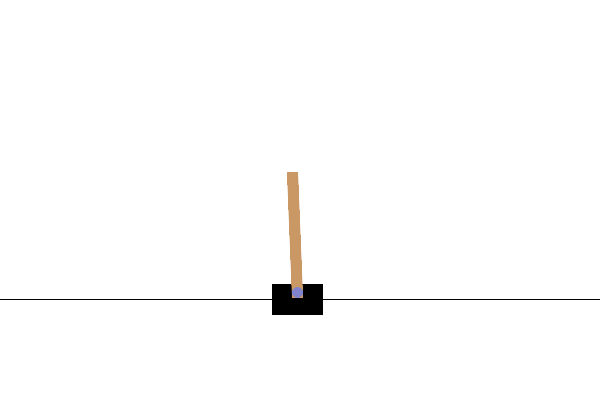

In [8]:
#@test {"skip": true}
env.reset()
PIL.Image.fromarray(env.render())

The `environment.step` method takes an `action` in the environment and returns a `TimeStep` tuple containing the next observation of the environment and the reward for the action.

The `time_step_spec()` method returns the specification for the `TimeStep` tuple. Its `observation` attribute shows the shape of observations, the data types, and the ranges of allowed values. The `reward` attribute shows the same details for the reward.


In [9]:
print('Observation Spec:')
print(env.time_step_spec().observation)

Observation Spec:
BoundedArraySpec(shape=(4,), dtype=dtype('float32'), name='observation', minimum=[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], maximum=[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38])


In [10]:
print('Reward Spec:')
print(env.time_step_spec().reward)

Reward Spec:
ArraySpec(shape=(), dtype=dtype('float32'), name='reward')


The `action_spec()` method returns the shape, data types, and allowed values of valid actions.

In [11]:
print('Action Spec:')
print(env.action_spec())

Action Spec:
BoundedArraySpec(shape=(), dtype=dtype('int64'), name='action', minimum=0, maximum=1)


In the Cartpole environment:

-   `observation` is an array of 4 floats: 
    -   the position and velocity of the cart
    -   the angular position and velocity of the pole 
-   `reward` is a scalar float value
-   `action` is a scalar integer with only two possible values:
    -   `0` — "move left"
    -   `1` — "move right"


In [12]:
time_step = env.reset()
print('Time step:')
print(time_step)

action = np.array(1, dtype=np.int32)

next_time_step = env.step(action)
print('Next time step:')
print(next_time_step)

Time step:
TimeStep(
{'discount': array(1., dtype=float32),
 'observation': array([ 0.03982952,  0.03095708,  0.02307781, -0.0216785 ], dtype=float32),
 'reward': array(0., dtype=float32),
 'step_type': array(0, dtype=int32)})
Next time step:
TimeStep(
{'discount': array(1., dtype=float32),
 'observation': array([ 0.04044866,  0.2257406 ,  0.02264424, -0.3069917 ], dtype=float32),
 'reward': array(1., dtype=float32),
 'step_type': array(1, dtype=int32)})


Usually two environments are instantiated: one for training and one for evaluation. 

In [13]:
train_py_env = suite_gym.load(env_name)
eval_py_env = suite_gym.load(env_name)

The Cartpole environment, like most environments, is written in pure Python. This is converted to TensorFlow using the `TFPyEnvironment` wrapper.

The original environment's API uses Numpy arrays. The `TFPyEnvironment` converts these to `Tensors` to make it compatible with Tensorflow agents and policies.


In [14]:
train_env = tf_py_environment.TFPyEnvironment(train_py_env)
eval_env = tf_py_environment.TFPyEnvironment(eval_py_env)

## Agent

The algorithm used to solve an RL problem is represented by an `Agent`. TF-Agents provides standard implementations of a variety of `Agents`, including:

-   [DQN](https://storage.googleapis.com/deepmind-media/dqn/DQNNaturePaper.pdf) (used in this tutorial)
-   [REINFORCE](https://www-anw.cs.umass.edu/~barto/courses/cs687/williams92simple.pdf)
-   [DDPG](https://arxiv.org/pdf/1509.02971.pdf)
-   [TD3](https://arxiv.org/pdf/1802.09477.pdf)
-   [PPO](https://arxiv.org/abs/1707.06347)
-   [SAC](https://arxiv.org/abs/1801.01290)

The DQN agent can be used in any environment which has a discrete action space.

At the heart of a DQN Agent is a `QNetwork`, a neural network model that can learn to predict `QValues` (expected returns) for all actions, given an observation from the environment.

We will use `tf_agents.networks.` to create a `QNetwork`. The network will consist of a sequence of `tf.keras.layers.Dense` layers, where the final layer will have 1 output for each possible action.

In [15]:
fc_layer_params = (100, 50)
action_tensor_spec = tensor_spec.from_spec(env.action_spec())
num_actions = action_tensor_spec.maximum - action_tensor_spec.minimum + 1

# Define a helper function to create Dense layers configured with the right
# activation and kernel initializer.
def dense_layer(num_units):
  return tf.keras.layers.Dense(
      num_units,
      activation=tf.keras.activations.relu,
      kernel_initializer=tf.keras.initializers.VarianceScaling(
          scale=2.0, mode='fan_in', distribution='truncated_normal'))

# QNetwork consists of a sequence of Dense layers followed by a dense layer
# with `num_actions` units to generate one q_value per available action as
# its output.
dense_layers = [dense_layer(num_units) for num_units in fc_layer_params]
q_values_layer = tf.keras.layers.Dense(
    num_actions,
    activation=None,
    kernel_initializer=tf.keras.initializers.RandomUniform(
        minval=-0.03, maxval=0.03),
    bias_initializer=tf.keras.initializers.Constant(-0.2))
q_net = sequential.Sequential(dense_layers + [q_values_layer])

Now use `tf_agents.agents.dqn.dqn_agent` to instantiate a `DqnAgent`. In addition to the `time_step_spec`, `action_spec` and the QNetwork, the agent constructor also requires an optimizer (in this case, `AdamOptimizer`), a loss function, and an integer step counter.

In [16]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

train_step_counter = tf.Variable(0)

agent = dqn_agent.DqnAgent(
    train_env.time_step_spec(),
    train_env.action_spec(),
    q_network=q_net,
    optimizer=optimizer,
    td_errors_loss_fn=common.element_wise_squared_loss,
    train_step_counter=train_step_counter)

agent.initialize()

## Policies

A policy defines the way an agent acts in an environment. Typically, the goal of reinforcement learning is to train the underlying model until the policy produces the desired outcome.

In this tutorial:

-   The desired outcome is keeping the pole balanced upright over the cart.
-   The policy returns an action (left or right) for each `time_step` observation.

Agents contain two policies: 

-   `agent.policy` — The main policy that is used for evaluation and deployment.
-   `agent.collect_policy` — A second policy that is used for data collection.


In [17]:
eval_policy = agent.policy
collect_policy = agent.collect_policy

Policies can be created independently of agents. For example, use `tf_agents.policies.random_tf_policy` to create a policy which will randomly select an action for each `time_step`.

In [18]:
random_policy = random_tf_policy.RandomTFPolicy(train_env.time_step_spec(),
                                                train_env.action_spec())

To get an action from a policy, call the `policy.action(time_step)` method. The `time_step` contains the observation from the environment. This method returns a `PolicyStep`, which is a named tuple with three components:

-   `action` — the action to be taken (in this case, `0` or `1`)
-   `state` — used for stateful (that is, RNN-based) policies
-   `info` — auxiliary data, such as log probabilities of actions

In [19]:
example_environment = tf_py_environment.TFPyEnvironment(
    suite_gym.load('CartPole-v0'))

In [20]:
time_step = example_environment.reset()

In [21]:
random_policy.action(time_step)

PolicyStep(action=<tf.Tensor: shape=(1,), dtype=int64, numpy=array([0])>, state=(), info=())

## Metrics and Evaluation

The most common metric used to evaluate a policy is the average return. The return is the sum of rewards obtained while running a policy in an environment for an episode. Several episodes are run, creating an average return.

The following function computes the average return of a policy, given the policy, environment, and a number of episodes.


In [22]:
#@test {"skip": true}
def compute_avg_return(environment, policy, num_episodes=10):

  total_return = 0.0
  for _ in range(num_episodes):

    time_step = environment.reset()
    episode_return = 0.0

    while not time_step.is_last():
      action_step = policy.action(time_step)
      time_step = environment.step(action_step.action)
      episode_return += time_step.reward
    total_return += episode_return

  avg_return = total_return / num_episodes
  return avg_return.numpy()[0]


# See also the metrics module for standard implementations of different metrics.
# https://github.com/tensorflow/agents/tree/master/tf_agents/metrics

Running this computation on the `random_policy` shows a baseline performance in the environment.

In [23]:
compute_avg_return(eval_env, random_policy, num_eval_episodes)

19.4

## Replay Buffer

In order to keep track of the data collected from the environment, we will use [Reverb](https://deepmind.com/research/open-source/Reverb), an efficient, extensible, and easy-to-use replay system by Deepmind. It stores experience data when we collect trajectories and is consumed during training.

This replay buffer is constructed using specs describing the tensors that are to be stored, which can be obtained from the agent using agent.collect_data_spec.


In [24]:
table_name = 'uniform_table'
replay_buffer_signature = tensor_spec.from_spec(
      agent.collect_data_spec)
replay_buffer_signature = tensor_spec.add_outer_dim(
    replay_buffer_signature)

table = reverb.Table(
    table_name,
    max_size=replay_buffer_max_length,
    sampler=reverb.selectors.Uniform(),
    remover=reverb.selectors.Fifo(),
    rate_limiter=reverb.rate_limiters.MinSize(1),
    signature=replay_buffer_signature)

reverb_server = reverb.Server([table])

replay_buffer = reverb_replay_buffer.ReverbReplayBuffer(
    agent.collect_data_spec,
    table_name=table_name,
    sequence_length=2,
    local_server=reverb_server)

rb_observer = reverb_utils.ReverbAddTrajectoryObserver(
  replay_buffer.py_client,
  table_name,
  sequence_length=2)

[reverb/cc/platform/tfrecord_checkpointer.cc:150]  Initializing TFRecordCheckpointer in /tmp/tmpdoioyfy9.
[reverb/cc/platform/tfrecord_checkpointer.cc:386] Loading latest checkpoint from /tmp/tmpdoioyfy9
[reverb/cc/platform/default/server.cc:71] Started replay server on port 24185


For most agents, `collect_data_spec` is a named tuple called `Trajectory`, containing the specs for observations, actions, rewards, and other items.

In [25]:
agent.collect_data_spec

Trajectory(
{'action': BoundedTensorSpec(shape=(), dtype=tf.int64, name='action', minimum=array(0), maximum=array(1)),
 'discount': BoundedTensorSpec(shape=(), dtype=tf.float32, name='discount', minimum=array(0., dtype=float32), maximum=array(1., dtype=float32)),
 'next_step_type': TensorSpec(shape=(), dtype=tf.int32, name='step_type'),
 'observation': BoundedTensorSpec(shape=(4,), dtype=tf.float32, name='observation', minimum=array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32), maximum=array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
      dtype=float32)),
 'policy_info': (),
 'reward': TensorSpec(shape=(), dtype=tf.float32, name='reward'),
 'step_type': TensorSpec(shape=(), dtype=tf.int32, name='step_type')})

In [26]:
agent.collect_data_spec._fields

('step_type',
 'observation',
 'action',
 'policy_info',
 'next_step_type',
 'reward',
 'discount')

## Data Collection

Now execute the random policy in the environment for a few steps, recording the data in the replay buffer.

Here we are using 'PyDriver' to run the experience collecting loop. You can learn more about TF Agents driver in our [drivers tutorial](https://www.tensorflow.org/agents/tutorials/4_drivers_tutorial).

In [27]:
#@test {"skip": true}
py_driver.PyDriver(
    env,
    py_tf_eager_policy.PyTFEagerPolicy(
      random_policy, use_tf_function=True),
    [rb_observer],
    max_steps=initial_collect_steps).run(train_py_env.reset())

(TimeStep(
 {'discount': array(1., dtype=float32),
  'observation': array([-0.01682967, -0.5797006 ,  0.11501301,  0.994641  ], dtype=float32),
  'reward': array(1., dtype=float32),
  'step_type': array(1, dtype=int32)}),
 ())

The replay buffer is now a collection of Trajectories.

In [28]:
# For the curious:
# Uncomment to peel one of these off and inspect it.
# iter(replay_buffer.as_dataset()).next()

The agent needs access to the replay buffer. This is provided by creating an iterable `tf.data.Dataset` pipeline which will feed data to the agent.

Each row of the replay buffer only stores a single observation step. But since the DQN Agent needs both the current and next observation to compute the loss, the dataset pipeline will sample two adjacent rows for each item in the batch (`num_steps=2`).

This dataset is also optimized by running parallel calls and prefetching data.

In [29]:
# Dataset generates trajectories with shape [Bx2x...]
dataset = replay_buffer.as_dataset(
    num_parallel_calls=3,
    sample_batch_size=batch_size,
    num_steps=2).prefetch(3)

dataset

<PrefetchDataset element_spec=(Trajectory(
{'action': TensorSpec(shape=(64, 2), dtype=tf.int64, name=None),
 'discount': TensorSpec(shape=(64, 2), dtype=tf.float32, name=None),
 'next_step_type': TensorSpec(shape=(64, 2), dtype=tf.int32, name=None),
 'observation': TensorSpec(shape=(64, 2, 4), dtype=tf.float32, name=None),
 'policy_info': (),
 'reward': TensorSpec(shape=(64, 2), dtype=tf.float32, name=None),
 'step_type': TensorSpec(shape=(64, 2), dtype=tf.int32, name=None)}), SampleInfo(key=TensorSpec(shape=(64, 2), dtype=tf.uint64, name=None), probability=TensorSpec(shape=(64, 2), dtype=tf.float64, name=None), table_size=TensorSpec(shape=(64, 2), dtype=tf.int64, name=None), priority=TensorSpec(shape=(64, 2), dtype=tf.float64, name=None)))>

In [30]:
iterator = iter(dataset)
print(iterator)

In [31]:
# For the curious:
# Uncomment to see what the dataset iterator is feeding to the agent.
# Compare this representation of replay data 
# to the collection of individual trajectories shown earlier.

# iterator.next()

## Training the agent

Two things must happen during the training loop:

-   collect data from the environment
-   use that data to train the agent's neural network(s)

This example also periodicially evaluates the policy and prints the current score.

The following will take ~5 minutes to run.

In [32]:
#@test {"skip": true}
try:
  %%time
except:
  pass

# (Optional) Optimize by wrapping some of the code in a graph using TF function.
agent.train = common.function(agent.train)

# Reset the train step.
agent.train_step_counter.assign(0)

# Evaluate the agent's policy once before training.
avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes)
returns = [avg_return]

# Reset the environment.
time_step = train_py_env.reset()

# Create a driver to collect experience.
collect_driver = py_driver.PyDriver(
    env,
    py_tf_eager_policy.PyTFEagerPolicy(
      agent.collect_policy, use_tf_function=True),
    [rb_observer],
    max_steps=collect_steps_per_iteration)

for _ in range(num_iterations):

  # Collect a few steps and save to the replay buffer.
  time_step, _ = collect_driver.run(time_step)

  # Sample a batch of data from the buffer and update the agent's network.
  experience, unused_info = next(iterator)
  train_loss = agent.train(experience).loss

  step = agent.train_step_counter.numpy()

  if step % log_interval == 0:
    print('step = {0}: loss = {1}'.format(step, train_loss))

  if step % eval_interval == 0:
    avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes)
    print('step = {0}: Average Return = {1}'.format(step, avg_return))
    returns.append(avg_return)

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))


[reverb/cc/client.cc:165] Sampler and server are owned by the same process (9862) so Table uniform_table is accessed directly without gRPC.
[reverb/cc/client.cc:165] Sampler and server are owned by the same process (9862) so Table uniform_table is accessed directly without gRPC.
[reverb/cc/client.cc:165] Sampler and server are owned by the same process (9862) so Table uniform_table is accessed directly without gRPC.
[reverb/cc/client.cc:165] Sampler and server are owned by the same process (9862) so Table uniform_table is accessed directly without gRPC.
[reverb/cc/client.cc:165] Sampler and server are owned by the same process (9862) so Table uniform_table is accessed directly without gRPC.
[reverb/cc/client.cc:165] Sampler and server are owned by the same process (9862) so Table uniform_table is accessed directly without gRPC.


step = 200: loss = 16.015960693359375


step = 400: loss = 47.185611724853516


step = 600: loss = 736.9923095703125


step = 800: loss = 175.4927215576172


step = 1000: loss = 65.5635757446289


step = 1000: Average Return = 171.1999969482422


step = 1200: loss = 1594.881103515625


step = 1400: loss = 32.85587692260742


step = 1600: loss = 88.44110107421875


step = 1800: loss = 2868.479248046875


step = 2000: loss = 1537.3463134765625


step = 2000: Average Return = 129.6999969482422


step = 2200: loss = 282.4945983886719


step = 2400: loss = 918.4564208984375


step = 2600: loss = 118.39675903320312


step = 2800: loss = 86.51387023925781


step = 3000: loss = 43.96769714355469


step = 3000: Average Return = 151.39999389648438


step = 3200: loss = 37.7552490234375


step = 3400: loss = 55.306640625


step = 3600: loss = 145.16598510742188


step = 3800: loss = 30.914730072021484


step = 4000: loss = 115.53938293457031


step = 4000: Average Return = 180.10000610351562


step = 4200: loss = 55.767601013183594


step = 4400: loss = 59.72187805175781


step = 4600: loss = 54.24274826049805


step = 4800: loss = 218.40969848632812


step = 5000: loss = 310.97296142578125


step = 5000: Average Return = 200.0


step = 5200: loss = 74.71685791015625


step = 5400: loss = 505.34075927734375


step = 5600: loss = 349.7851257324219


step = 5800: loss = 556.5531005859375


step = 6000: loss = 393.497802734375


step = 6000: Average Return = 200.0


step = 6200: loss = 632.537109375


step = 6400: loss = 233.87774658203125


step = 6600: loss = 149.68161010742188


step = 6800: loss = 771.809326171875


step = 7000: loss = 136.535888671875


step = 7000: Average Return = 200.0


step = 7200: loss = 214.4747314453125


step = 7400: loss = 2745.0703125


step = 7600: loss = 4504.373046875


step = 7800: loss = 295.11859130859375


step = 8000: loss = 1483.1090087890625


step = 8000: Average Return = 200.0


step = 8200: loss = 13224.90625


step = 8400: loss = 731.6187744140625


step = 8600: loss = 2498.115234375


step = 8800: loss = 2752.463134765625


step = 9000: loss = 571.6118774414062


step = 9000: Average Return = 194.3000030517578


step = 9200: loss = 433.17413330078125


step = 9400: loss = 494.7076416015625


step = 9600: loss = 409.4160461425781


step = 9800: loss = 444.74029541015625


step = 10000: loss = 417.860595703125


step = 10000: Average Return = 200.0


step = 10200: loss = 241.61526489257812


step = 10400: loss = 323.7486267089844


step = 10600: loss = 1961.7996826171875


step = 10800: loss = 467.81781005859375


step = 11000: loss = 75.74491882324219


step = 11000: Average Return = 200.0


step = 11200: loss = 652.3634643554688


step = 11400: loss = 211.48666381835938


step = 11600: loss = 170.49517822265625


step = 11800: loss = 119.90447998046875


step = 12000: loss = 991.9341430664062


step = 12000: Average Return = 200.0


step = 12200: loss = 101.59536743164062


step = 12400: loss = 148.53955078125


step = 12600: loss = 191.56800842285156


step = 12800: loss = 115.52975463867188


step = 13000: loss = 70.33795166015625


step = 13000: Average Return = 200.0


step = 13200: loss = 70.56562805175781


step = 13400: loss = 159.9202880859375


step = 13600: loss = 1406.8662109375


step = 13800: loss = 85.49430847167969


step = 14000: loss = 84.74932861328125


step = 14000: Average Return = 200.0


step = 14200: loss = 317.33819580078125


step = 14400: loss = 707.352294921875


step = 14600: loss = 53.67301940917969


step = 14800: loss = 100.62562561035156


step = 15000: loss = 764.060546875


step = 15000: Average Return = 200.0


step = 15200: loss = 90.79063415527344


step = 15400: loss = 122.30677795410156


step = 15600: loss = 69.46464538574219


step = 15800: loss = 554.35498046875


step = 16000: loss = 96.95709228515625


step = 16000: Average Return = 200.0


step = 16200: loss = 1974.1376953125


step = 16400: loss = 203.4429931640625


step = 16600: loss = 254.4991912841797


step = 16800: loss = 237.65127563476562


step = 17000: loss = 1236.594482421875


step = 17000: Average Return = 200.0


step = 17200: loss = 2782.07958984375


step = 17400: loss = 469.6650085449219


step = 17600: loss = 7143.4326171875


step = 17800: loss = 15037.6240234375


step = 18000: loss = 4602.244140625


step = 18000: Average Return = 200.0


step = 18200: loss = 264.796142578125


step = 18400: loss = 236.1230010986328


step = 18600: loss = 2736.951416015625


step = 18800: loss = 239.957275390625


step = 19000: loss = 534.1686401367188


step = 19000: Average Return = 200.0


step = 19200: loss = 391.1002197265625


step = 19400: loss = 352.6400146484375


step = 19600: loss = 232.7955780029297


step = 19800: loss = 140.59347534179688


step = 20000: loss = 22495.046875


step = 20000: Average Return = 200.0


## Visualization


### Plots

Use `matplotlib.pyplot` to chart how the policy improved during training.

One iteration of `Cartpole-v0` consists of 200 time steps. The environment gives a reward of `+1` for each step the pole stays up, so the maximum return for one episode is 200. The charts shows the return increasing towards that maximum each time it is evaluated during training. (It may be a little unstable and not increase monotonically each time.)

(21.814999198913576, 250.0)

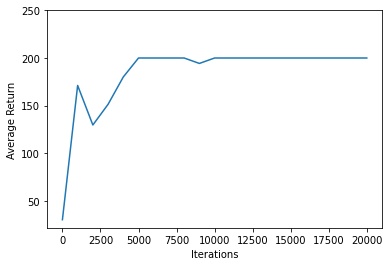

In [33]:
#@test {"skip": true}

iterations = range(0, num_iterations + 1, eval_interval)
plt.plot(iterations, returns)
plt.ylabel('Average Return')
plt.xlabel('Iterations')
plt.ylim(top=250)

### Videos

Charts are nice. But more exciting is seeing an agent actually performing a task in an environment. 

First, create a function to embed videos in the notebook.

In [34]:
def embed_mp4(filename):
  """Embeds an mp4 file in the notebook."""
  video = open(filename,'rb').read()
  b64 = base64.b64encode(video)
  tag = '''
  <video width="640" height="480" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
  Your browser does not support the video tag.
  </video>'''.format(b64.decode())

  return IPython.display.HTML(tag)

Now iterate through a few episodes of the Cartpole game with the agent. The underlying Python environment (the one "inside" the TensorFlow environment wrapper) provides a `render()` method, which outputs an image of the environment state. These can be collected into a video.

In [35]:
def create_policy_eval_video(policy, filename, num_episodes=5, fps=30):
  filename = filename + ".mp4"
  with imageio.get_writer(filename, fps=fps) as video:
    for _ in range(num_episodes):
      time_step = eval_env.reset()
      video.append_data(eval_py_env.render())
      while not time_step.is_last():
        action_step = policy.action(time_step)
        time_step = eval_env.step(action_step.action)
        video.append_data(eval_py_env.render())
  return embed_mp4(filename)

create_policy_eval_video(agent.policy, "trained-agent")

/tmpfs/src/tf_docs_env/lib/python3.7/site-packages/imageio/plugins/ffmpeg.py:727: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.write(im.tostring())
[swscaler @ 0x561c2ab733c0] Warning: data is not aligned! This can lead to a speed loss


For fun, compare the trained agent (above) to an agent moving randomly. (It does not do as well.)

In [36]:
create_policy_eval_video(random_policy, "random-agent")

/tmpfs/src/tf_docs_env/lib/python3.7/site-packages/imageio/plugins/ffmpeg.py:727: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  self._proc.stdin.write(im.tostring())
[swscaler @ 0x5558c4e7f3c0] Warning: data is not aligned! This can lead to a speed loss
